#Housing price predictor

## Authors
Pranav Nair

## Project Description
Develop a regression model that accurately predicts housing price

## Introduction



In this project, I developed two regression models to predict housing prices using the "House Sales in King County" dataset from Kaggle. I prepared the dataset, converting 'date' to a numeric type and removing extraneous features, then performed exploratory analysis and visualized feature-price relationships. The first model was a cubic polynomial-expanded linear regression, and the second, a ridge regression with quadratic expansion. Model performance was evaluated by R-squared among other metrics, aiming to uncover the determinants of housing prices for accurate predictions.

In [6]:
%matplotlib inline
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import datetime as dt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error , r2_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression , Ridge , Lasso

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Exploratory Data Analysis


In [8]:
datadir = '/content/drive/My Drive/data'
kc_house_data = pd.read_csv(os.path.join(datadir, 'kc_house_data.csv'))
kc_house_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


This is my dataset of all the house sales in king county


In [ ]:
kc_house_data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

As we can see here, all features aside from date are of numeric types. We can change The date to a numeric type to help us when selecting features

In [ ]:
kc_house_data['date'] = pd.to_datetime(kc_house_data['date']).map(dt.datetime.toordinal)
kc_house_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,735519,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,735576,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,735654,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,735576,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,735647,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,735374,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,735652,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,735407,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,735614,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


# **Models, methods and algorithms:**
## First model will be a regression model that uses features to predict housing prices

# **Graphs & Correlation Matrix**
### The following graphs and correlation matrix will show us which features are best at predicting prices. Additionaly, It allows us to see if we need to apply a feature transformation to the data, as some features may not be linearly correlated but still be applicable.

Scatter plots of each variable vs price


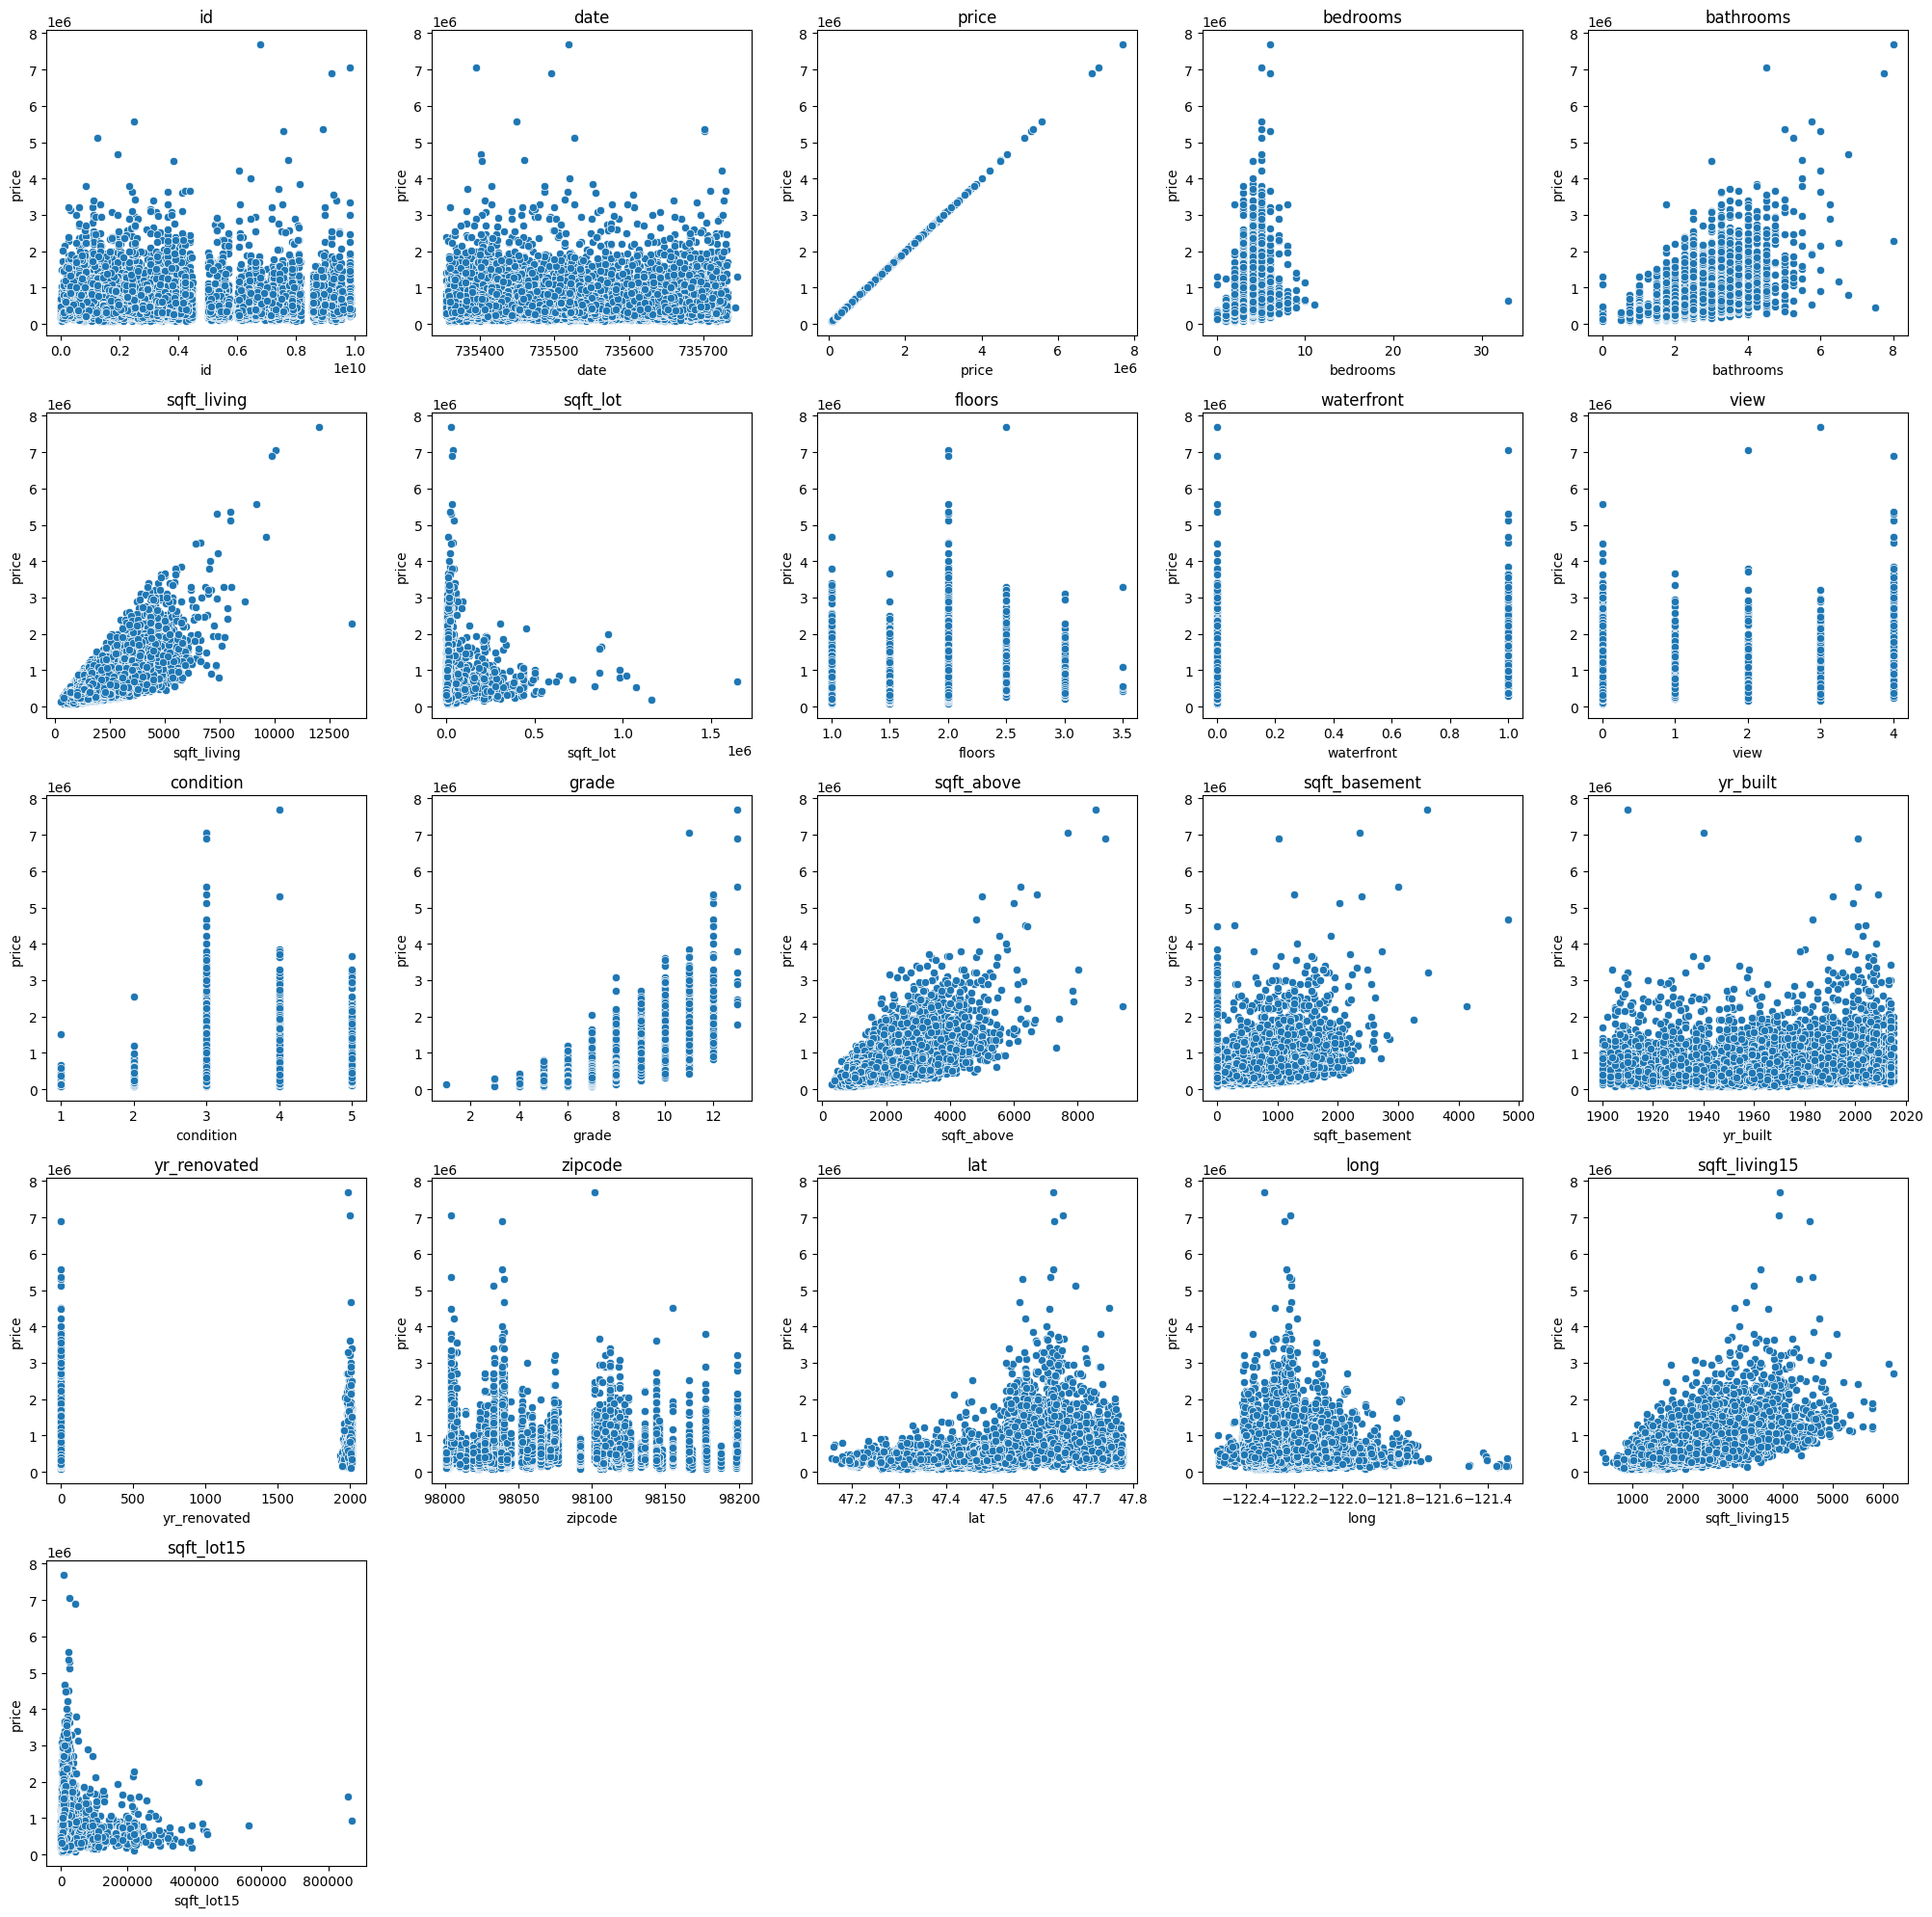

In [ ]:
plt.figure(figsize=(20, 20))
for feature in kc_house_data.columns.to_list():
    plt.subplot(5, 5, kc_house_data.columns.to_list().index(feature) + 1)
    sns.scatterplot(data=kc_house_data, x = feature, y = 'price')
    plt.title(feature)
plt.tight_layout()
plt.show()

**Our correlation matrix**

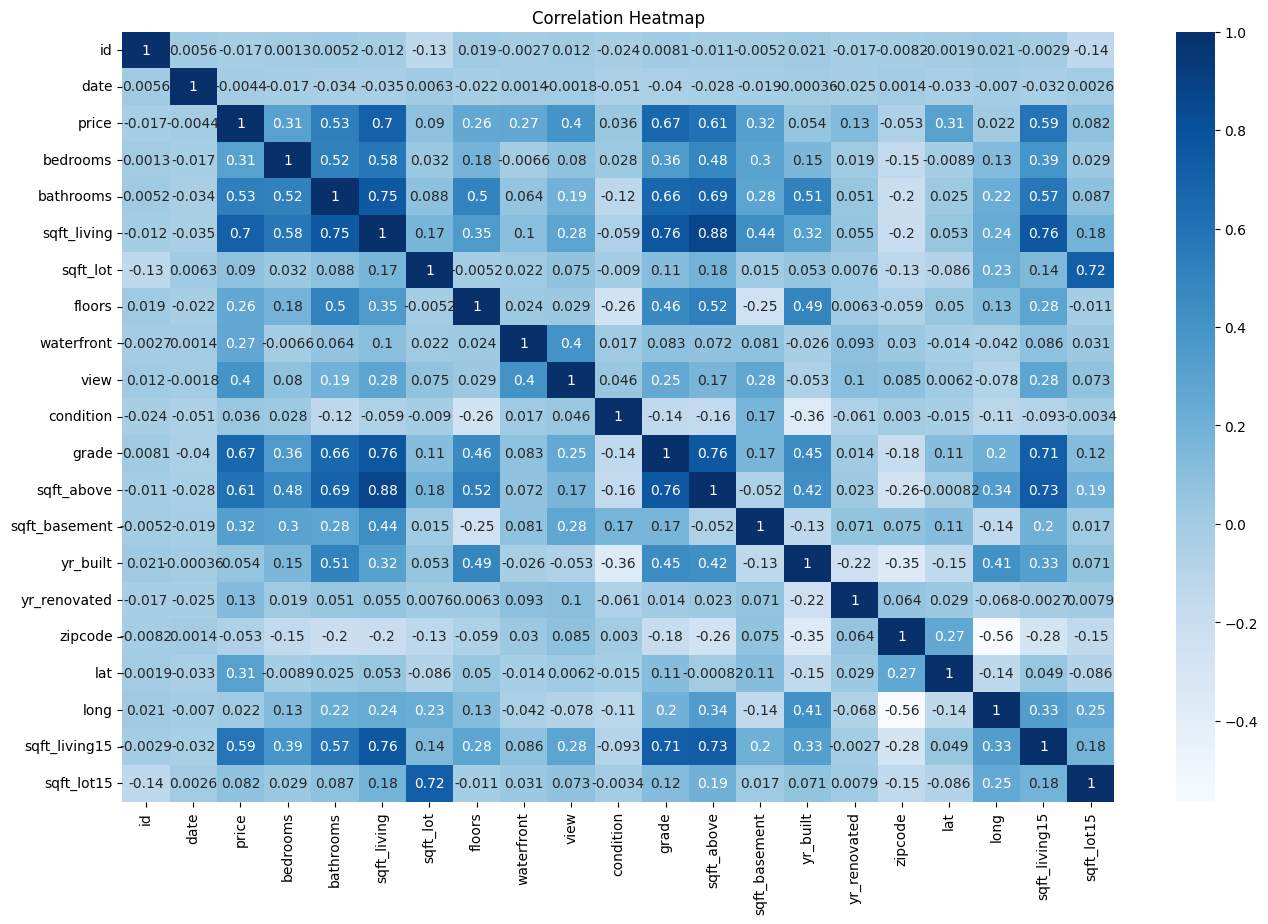

In [ ]:
correlation_matrix = kc_house_data.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()

## I will now drop features that seem to not accurately predict housing price. These features are: 'id', 'date', 'bedrooms', 'floors', 'waterfront', 'view', 'condition', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_lot'

In [9]:
lin_reg_data = kc_house_data.drop(['id', 'date', 'bedrooms', 'floors', 'waterfront', 'view', 'condition', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_lot'],axis=1,inplace=False)

## Prediction
Now I can begin to create a linear regression model for prediction. First must split the data into training and testing data.

In [ ]:
target = 'price'
X = lin_reg_data.drop(columns=[target])
y = lin_reg_data[target]

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X ,y ,test_size=0.2 , random_state=42 )
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (17290, 9)
y_train shape: (17290,)
X_test shape: (4323, 9)
y_test shape: (4323,)




# Linear Regression Model

As seeb in the graphs before some variables are correlated with price,but not linearly. To account for this, I will apply a feature transformation, specifically polinomial expanison.

In [ ]:
def polynomial_expansion(X, degrees, mu=None, sigma=None):
  N, d = X.shape

  # Calculate the dimension of the transformed feature vector phi(x)
  D = (len(degrees) - 1) * d + 1 if 0 in degrees else len(degrees) * d

  X_new_unnormalized = np.empty([N, D])
  if 0 in degrees:
    X_new_unnormalized[:, 0] = 1
    column = 1
  else:
    column = 0  # Track current column position

  for degree in degrees:
    if degree != 0:
      new_features = X ** degree  # (N, d)
      X_new_unnormalized[:, column:column + d] = new_features  # Populate the next d columns
      column += d

  # Normalize features (independently).
  if mu is None or sigma is None:
    mu = X_new_unnormalized.mean(0)
    sigma = X_new_unnormalized.std(0)
    sigma[sigma < 0.0001] = 1  # If the feature is constant, variance is zero. Avoid division by zero

  X_new = (X_new_unnormalized - mu) / sigma
  if 0 in degrees:
    X_new[:, 0] = 1  # We don't normalize the bias dimension.

  return X_new

Now we can transform our X values and normalize them and test the model.

In [ ]:
X_train_transformed = polynomial_expansion(X_train, (0,1,2, 3))
X_test_transformed = polynomial_expansion(X_test, (0,1,2, 3))

In [ ]:
model = LinearRegression().fit(X_train_transformed, y_train)
model.score(X_test_transformed, y_test)

0.6591017125198437

By applying polynomial expansion, the model captures non-linear relationships between the features and the target variable. The achieved an R-squared value of 0.6591017125198437 suggests that there is a strong correlation between the features and prices.

# **Ridge Regression**

To account for the fact that the model may be overfitting, I will use ridge regression, which has a regularization term to possibly help the model work better on data that it may not have seen before(e.g. test data)



In [ ]:
X_train_transformed = polynomial_expansion(X_train, (0,1,2))
X_test_transformed = polynomial_expansion(X_test, (0,1,2))

In [ ]:
model = Ridge().fit(X_train_transformed, y_train)
model.score(X_test_transformed, y_test)

0.6229012061718041

Instead of doing a cubic polynomial expansion as the feature function, I found that the ridge regression model performed better when the feature function was a quadratic polynomial expansion. Furthermore the R-squared value of 0.6229012061718041 indicates the model performs well, but not as well as linear regression.

## RESULTS

The Exploratory Data Analysis indicates that certain features such as square footage of living space (sqft_living), grade, and the number of bathrooms (bathrooms) have a positive correlation with the house prices. This is a logical finding as larger homes with higher quality evaluations and more amenities generally command higher prices.

**Linear Regression Model:** The linear regression model, even after polynomial expansion to capture non-linearity, resulted in an R-squared score of approximately 0.659. This score suggests that while the model has predictive power, there is room for improvement as it explains roughly 65.9% of the variance in housing prices.

**Ringe Regression:** The R-squared value of 0.6229012061718041 indicates the model performs well. Therefore, this model does have predictive power and works well.

# Qualitative Analysis

**Linear Regression Limitations**: The linear regression model may not fully capture complex relationships and interactions between features. Additionally, the presence of outliers or high leverage points can disproportionately influence the model.

**Feature Engineering:**  Polynomial expansion is a step in the right direction; however, the model may benefit from more sophisticated feature engineering, such as interaction terms or region-based aggregate features.


**Data Quality**: The quality and granularity of the data can greatly impact model performance. Features like the year of renovation (yr_renovated) could be further engineered, for instance, by creating a binary feature indicating whether a house has been renovated or not.

**Future Directions:**
**More Complex Models: **Consider experimenting with more complex models such as Random Forests or Gradient Boosting Machines that can capture non-linear relationships and interactions between features better.

**Additional Data:** If you had access to more data, incorporating macroeconomic indicators such as interest rates, economic growth rates, or housing market trends could provide additional predictive power.

**Temporal Dynamics:** With more time, investigating how prices change over time and whether factors like seasonality play a role could be worthwhile.

**Additional Observed Features: **Including features like proximity to amenities, school district ratings, crime rates, or public transportation accessibility could enhance the model's predictive accuracy.

**Model Interpretability:** Future work might also include efforts to make the model more interpretable, such as using SHAP (SHapley Additive exPlanations) values to understand the impact of each feature on the prediction.

**Deployment and Monitoring: **Lastly, if moving towards a production environment, consider setting up a system for continuous model training and evaluation to adjust to new data over time.